In [70]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np; np.random.seed(42)
import csv
import pandas as pd
from PIL import Image
from pylab import *
%matplotlib notebook

In [71]:
df = pd.read_csv('embeded2D.csv',header=None)
df = df.as_matrix()

<IPython.core.display.Javascript object>


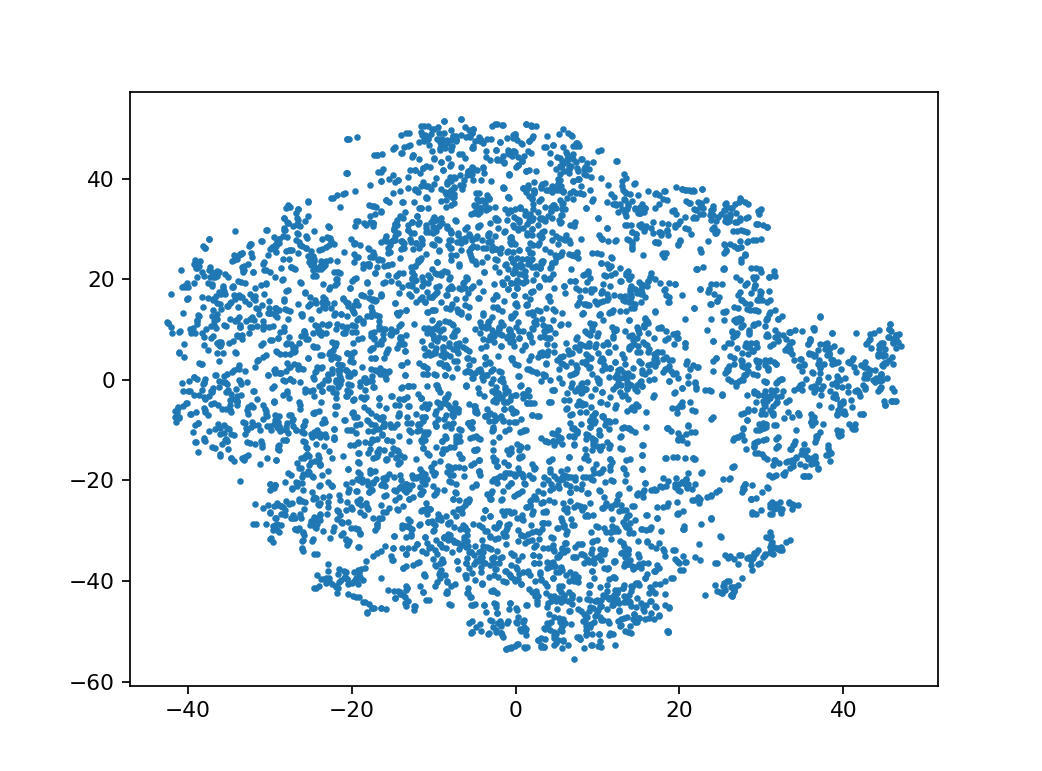

In [72]:
x = df[:,0]
y = df[:,1]
arr = np.empty((len(x),64,64,3))
for i in range(len(x)):
    im2 = plt.imread('./resizeImages/'+str(i+1)+'.jpg')
    arr[i, :,:,:] = im2/255

#perm = np.random.permutation(len(x))
#nsamples = 100
#x = x[perm[0:nsamples]]
#y = y[perm[0:nsamples]]
#arr = arr[perm[0:nsamples], :,:,:]

# create figure and plot scatter
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(x,y, ls="", marker="o",markersize=2)

# create the annotations box
im = OffsetImage(arr[0,:,:,:], zoom=1)

xybox=(50., 50.)
ab = AnnotationBbox(im, (0,0), xybox=xybox, xycoords='data',
        boxcoords="offset points",  pad=0.3,  arrowprops=dict(arrowstyle="->"))
# add it to the axes and make it invisible
ax.add_artist(ab)
ab.set_visible(False)

def hover(event):
    # if the mouse is over the scatter points
    if line.contains(event)[0]:
        # find out the index within the array from the event
        ind, = line.contains(event)[1]["ind"]
        # get the figure size
        w,h = fig.get_size_inches()*fig.dpi
        ws = (event.x > w/2.)*-1 + (event.x <= w/2.) 
        hs = (event.y > h/2.)*-1 + (event.y <= h/2.)
        # if event occurs in the top or right quadrant of the figure,
        # change the annotation box position relative to mouse.
        ab.xybox = (xybox[0]*ws, xybox[1]*hs)
        # make annotation box visible
        ab.set_visible(True)
        # place it at the position of the hovered scatter point
        ab.xy =(x[ind], y[ind])
        # set the image corresponding to that point
        im.set_data(arr[ind,:,:,:])
    else:
        #if the mouse is not over a scatter point
        ab.set_visible(False)
    fig.canvas.draw_idle()

# add callback for mouse moves
fig.canvas.mpl_connect('motion_notify_event', hover)           
plt.show()